In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mohammad0alfares/Linear_Regression_Detailed_Implementation/master/student_scores.csv', index_col=False)

In [14]:
df.columns = ["Hours", "Marks"]
df.head()

,Hours,Marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.shape

(25, 2)

# Data Visualization

To visualize distribution of data

Regression line is drawn over the points 

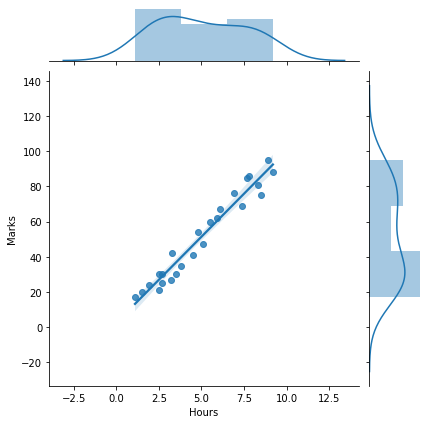

In [17]:
sns.jointplot(x=df['Hours'], y=df['Marks'], data=df, kind='reg')

# Splitting data into test and train

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Marks'], test_size=0.2, random_state=42)
x_train

9     2.7
13    3.3
1     5.1
22    3.8
5     1.5
2     3.2
12    4.5
15    8.9
3     8.5
4     3.5
20    2.7
17    1.9
21    4.8
18    6.1
24    7.8
7     5.5
10    7.7
14    1.1
19    7.4
6     9.2
Name: Hours, dtype: float64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Marks'], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Exception: ignored

# Linear Regression using Scikit

This is the linear regression model implemented using scikit library. 

In [0]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
prediction = cls.predict(x_test)

In [0]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [0]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[ 1.19463787]]


In [0]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [ 15.07636055]


In [0]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 153.209271672


In [0]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.615496585536


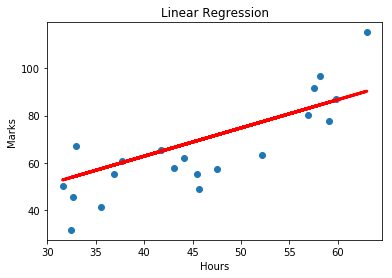

In [0]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Linear Regression')

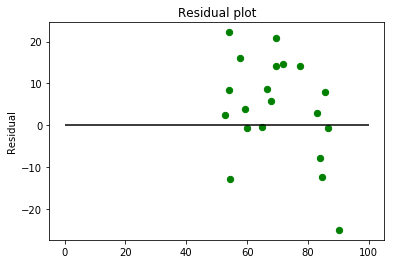

In [0]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

points are scattered around the line zero and there is no pattern that can be observed. This indicates that there no relation between predictors or time dependant data that is missed.

# Linear Regression using normal equaltions

In [0]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [0]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [0]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [0]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [0]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [ 15.07636055]
Slope of the model [ 1.19463787]
Mean squared error of the model 153.209271672
R squared value 0.615496585536


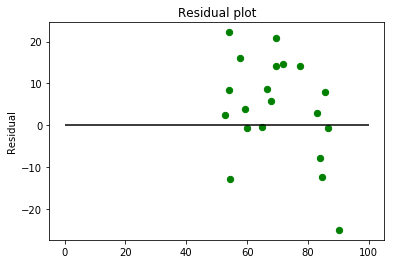

In [0]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Linear Regression using Gradient Descent

In [0]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [0]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

Slope of the model [ 1.48652326]
Intercept of the model [ 0.03399291]
Error value of the model [ 123.81572184]
R squared value 0.689264446653


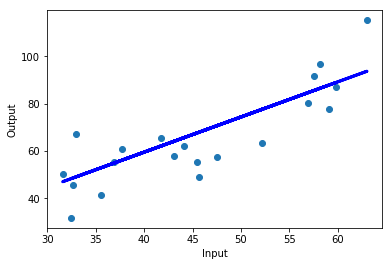

In [0]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()